<a href="https://colab.research.google.com/github/brilt/OpenCV/blob/main/Object%20detection%20DNN/Object_detection_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [12]:
# load the COCO class names
with open('object_detection_classes_coco.txt', 'r') as f:
   class_names = f.read().split('\n')
  
# get a different color array for each of the classes
COLORS = np.random.uniform(0, 255, size=(len(class_names), 3))

In [4]:
# load the DNN model
model = cv2.dnn.readNet(model='frozen_inference_graph.pb', config='ssd_mobilenet_v2_coco_2018_03_29.pbtxt.txt',framework='TensorFlow')


In [5]:
# read the image from disk
image = cv2.imread('/content/image1.jpg')
image_height, image_width, _ = image.shape
# create blob from image, openCV read BGR image, here we want RGB so we use swapRB
blob = cv2.dnn.blobFromImage(image=image, size=(300, 300), mean=(104, 117, 123), swapRB=True)
# set the blob to the model
model.setInput(blob)
# forward pass through the model to carry out the detection
output = model.forward()

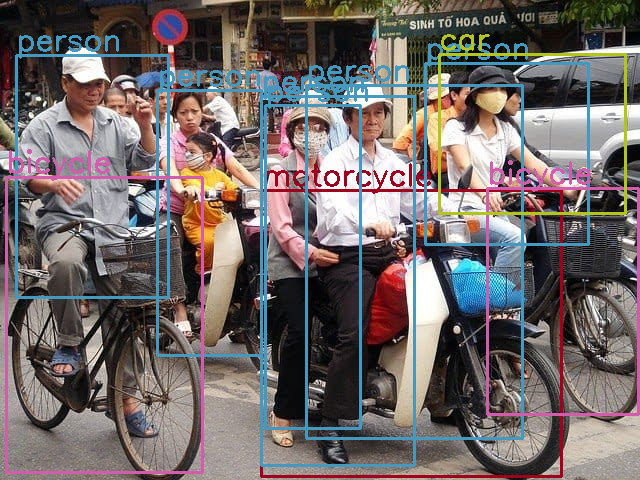

In [13]:
# loop over each of the detection
for detection in output[0, 0, :, :]:
   # extract the confidence of the detection
   confidence = detection[2]
   # draw bounding boxes only if the detection confidence is above...
   # ... a certain threshold, else skip
   if confidence > .4:
       # get the class id
       class_id = detection[1]
       # map the class id to the class
       class_name = class_names[int(class_id)-1]
       color = COLORS[int(class_id)]
       # get the bounding box coordinates
       box_x = detection[3] * image_width
       box_y = detection[4] * image_height
       # get the bounding box width and height
       box_width = detection[5] * image_width
       box_height = detection[6] * image_height
       # draw a rectangle around each detected object
       cv2.rectangle(image, (int(box_x), int(box_y)), (int(box_width), int(box_height)), color, thickness=2)
       # put the FPS text on top of the frame
       cv2.putText(image, class_name, (int(box_x), int(box_y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
  
cv2_imshow(image)
cv2.imwrite('image_result.jpg', image)
cv2.waitKey(0)
cv2.destroyAllWindows()